In [1]:
from dictionary.node import Node
from dictionary.word_frequency import WordFrequency
from dictionary.base_dictionary import BaseDictionary
from dictionary.list_dictionary import ListDictionary
from dictionary.hashtable_dictionary import HashTableDictionary
from dictionary.ternarysearchtree_dictionary import TernarySearchTreeDictionary

# Data generation

Source: Provided Kaggle file

In [2]:
words_frequencies_from_file = []
data_file = open('sampleData200k.txt', 'r')
for line in data_file:
    values = line.split()
    word = values[0]
    frequency = int(values[1])
    word_frequency = WordFrequency(word, frequency)  # each line contains a word and its frequency
    words_frequencies_from_file.append(word_frequency)
data_file.close()

words_frequencies_from_file_list=words_frequencies_from_file[:50000]
words_frequencies_from_file_hash=words_frequencies_from_file[50000:100000]
words_frequencies_from_file_tst=words_frequencies_from_file[100000:150000]

In [3]:
import time
import random

# Scenario 1: Growing dictionary

The dictionary is growing in size and you are to evaluate
and compare the running times of the Add operations across different data structures

In [4]:
test_samples = [0, 50, 500, 1000, 2000, 5000, 10000, 20000, 30000, 40000, 50000]

output_list_time_add_ns = []
agent1 = ListDictionary()

for i in range(10):
    init_time = time.time_ns()
    for wf in words_frequencies_from_file_list[test_samples[i]:test_samples[i+1]]:
        agent1.add_word_frequency(wf)                                            
    output_list_time_add_ns.append(time.time_ns() - init_time)


In [5]:
import matplotlib.pyplot as plt

[]

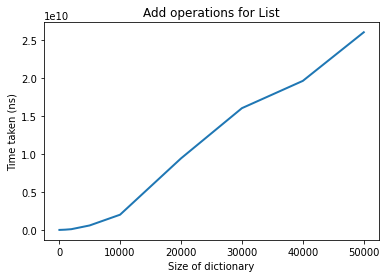

In [6]:
inputs = [50, 500, 1000, 2000, 5000, 10000, 20000, 30000, 40000, 50000]

plt.plot(inputs, output_list_time_add_ns, linewidth=2, markersize=12)
plt.title("Add operations for List")
plt.xlabel("Size of dictionary")
plt.ylabel("Time taken (ns)")

plt.plot()

In [7]:
test_samples = [0, 50, 500, 1000, 2000, 5000, 10000, 20000, 30000, 40000, 50000]

output_hash_time_add_ns = []
agent2 = HashTableDictionary()

for i in range(10):
    init_time = time.time_ns()
    for wf in words_frequencies_from_file_hash[test_samples[i]:test_samples[i+1]]:
        agent2.add_word_frequency(wf)                                            
    output_hash_time_add_ns.append(time.time_ns() - init_time)

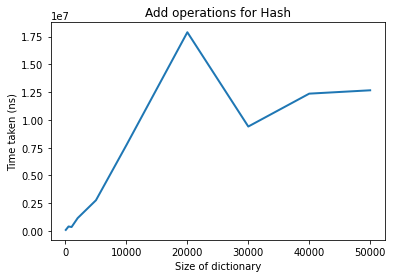

In [8]:
inputs = [50, 500, 1000, 2000, 5000, 10000, 20000, 30000, 40000, 50000]

plt.plot(inputs, output_hash_time_add_ns, linewidth=2, markersize=12)
plt.title("Add operations for Hash")
plt.xlabel("Size of dictionary")
plt.ylabel("Time taken (ns)")

plt.show()

In [9]:
test_samples = [0, 50, 500, 1000, 2000, 5000, 10000, 20000, 30000, 40000, 50000]

output_tst_time_add_ns = []
agent3 = TernarySearchTreeDictionary()

for i in range(10):
    init_time = time.time_ns()
    for wf in words_frequencies_from_file_tst[test_samples[i]:test_samples[i+1]]:
        agent3.add_word_frequency(wf)                                            
    output_tst_time_add_ns.append(time.time_ns() - init_time)

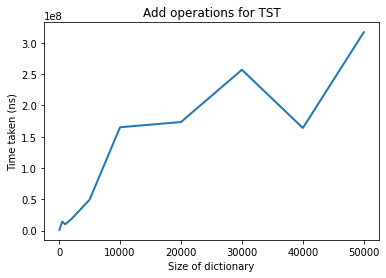

In [10]:
inputs = [50, 500, 1000, 2000, 5000, 10000, 20000, 30000, 40000, 50000]

plt.plot(inputs, output_tst_time_add_ns, linewidth=2, markersize=12)
plt.title("Add operations for TST")
plt.xlabel("Size of dictionary")
plt.ylabel("Time taken (ns)")

plt.show()

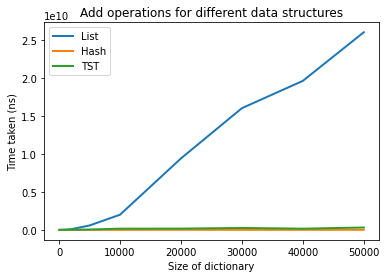

In [11]:
plt.plot(inputs, output_list_time_add_ns, linewidth=2, markersize=12, label='List')
plt.plot(inputs, output_hash_time_add_ns, linewidth=2, markersize=12, label='Hash')
plt.plot(inputs, output_tst_time_add_ns, linewidth=2, markersize=12, label='TST')

plt.title("Add operations for different data structures")
plt.xlabel("Size of dictionary")
plt.ylabel("Time taken (ns)")
plt.legend(loc = 'upper left')

plt.show()

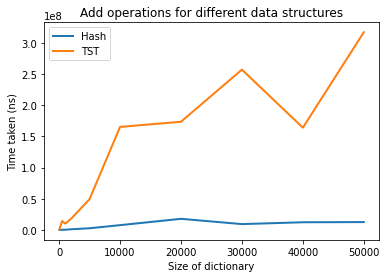

In [12]:
plt.plot(inputs, output_hash_time_add_ns, linewidth=2, markersize=12, label='Hash')
plt.plot(inputs, output_tst_time_add_ns, linewidth=2, markersize=12, label='TST')

plt.title("Add operations for different data structures")
plt.xlabel("Size of dictionary")
plt.ylabel("Time taken (ns)")
plt.legend(loc = 'upper left')

plt.show()

In [13]:
print(output_hash_time_add_ns)
print(output_list_time_add_ns)
print(output_tst_time_add_ns)

[97000, 406000, 359000, 1162000, 2767000, 7734000, 17894000, 9405000, 12366000, 12667000]
[247000, 15136000, 33514000, 96322000, 586631000, 2002756000, 9414389000, 16027677000, 19621022000, 26022351000]
[1177000, 14391000, 10234000, 18335000, 49442000, 165227000, 173527000, 257064000, 164005000, 317001000]


# Scenario 2: Shrinking dictionary

The dictionary is shrinking in size and you are to evaluate
and compare the running times of the Delete operations across different data structures

In [14]:
#shuffle datasets so words arent deleted in the order they were added
random.shuffle(words_frequencies_from_file_list)
random.shuffle(words_frequencies_from_file_hash)
random.shuffle(words_frequencies_from_file_tst)

In [15]:
test_samples = [0, 10000, 20000, 30000, 40000, 45000, 48000, 49000, 49500, 49950, 50000]

output_list_time_delete_ns = []

for i in range(10):
    init_time = time.time_ns()
    for wf in words_frequencies_from_file_list[test_samples[i]:test_samples[i+1]]:
        agent1.delete_word(wf.word)                                            
    output_list_time_delete_ns.append(time.time_ns() - init_time)
output_list_time_delete_ns

[18310914000,
 14186368000,
 11186676000,
 7550746000,
 1999040000,
 496977000,
 74693000,
 18537000,
 5153000,
 75000]

In [16]:
test_samples = [0, 10000, 20000, 30000, 40000, 45000, 48000, 49000, 49500, 49950, 50000]

output_hash_time_delete_ns = []

for i in range(10):
    init_time = time.time_ns()
    for wf in words_frequencies_from_file_hash[test_samples[i]:test_samples[i+1]]:
        agent2.delete_word(wf.word)                                            
    output_hash_time_delete_ns.append(time.time_ns() - init_time)
    
output_hash_time_delete_ns

[11649000,
 10376000,
 10122000,
 10706000,
 4775000,
 3693000,
 933000,
 460000,
 431000,
 47000]

In [17]:
test_samples = [0, 10000, 20000, 30000, 40000, 45000, 48000, 49000, 49500, 49950, 50000]

output_tst_time_delete_ns = []

for i in range(10):
    init_time = time.time_ns()
    for wf in words_frequencies_from_file_tst[test_samples[i]:test_samples[i+1]]:
        agent3.delete_word(wf.word)                                            
    output_tst_time_delete_ns.append(time.time_ns() - init_time)
    
output_tst_time_delete_ns

[132605000,
 124491000,
 123407000,
 127370000,
 69456000,
 38863000,
 13266000,
 6617000,
 5664000,
 708000]

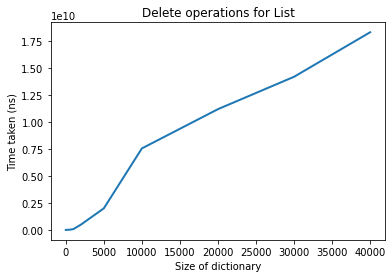

In [18]:
inputs = [40000, 30000, 20000, 10000, 5000, 2000, 1000, 500, 50, 0]

plt.plot(inputs, output_list_time_delete_ns, linewidth=2, markersize=12)
plt.title("Delete operations for List")
plt.xlabel("Size of dictionary")
plt.ylabel("Time taken (ns)")

plt.show()

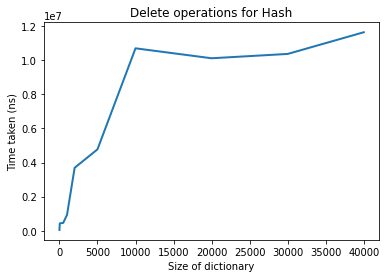

In [19]:
inputs = [40000, 30000, 20000, 10000, 5000, 2000, 1000, 500, 50, 0]

plt.plot(inputs, output_hash_time_delete_ns, linewidth=2, markersize=12)
plt.title("Delete operations for Hash")
plt.xlabel("Size of dictionary")
plt.ylabel("Time taken (ns)")

plt.show()

[]

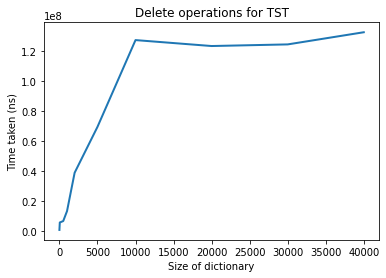

In [20]:
inputs = [40000, 30000, 20000, 10000, 5000, 2000, 1000, 500, 50, 0]

plt.plot(inputs, output_tst_time_delete_ns, linewidth=2, markersize=12)
plt.title("Delete operations for TST")
plt.xlabel("Size of dictionary")
plt.ylabel("Time taken (ns)")

plt.plot()

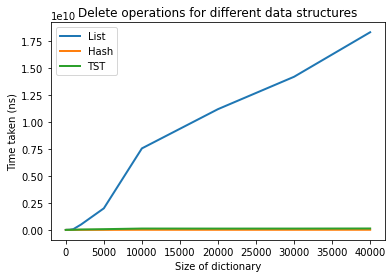

In [21]:
plt.plot(inputs, output_list_time_delete_ns, linewidth=2, markersize=12, label='List')
plt.plot(inputs, output_hash_time_delete_ns, linewidth=2, markersize=12, label='Hash')
plt.plot(inputs, output_tst_time_delete_ns, linewidth=2, markersize=12, label='TST')

plt.title("Delete operations for different data structures")
plt.xlabel("Size of dictionary")
plt.ylabel("Time taken (ns)")
plt.legend(loc = 'upper left')

plt.show()

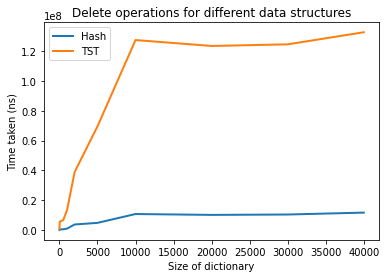

In [22]:
plt.plot(inputs, output_hash_time_delete_ns, linewidth=2, markersize=12, label='Hash')
plt.plot(inputs, output_tst_time_delete_ns, linewidth=2, markersize=12, label='TST')

plt.title("Delete operations for different data structures")
plt.xlabel("Size of dictionary")
plt.ylabel("Time taken (ns)")
plt.legend(loc = 'upper left')

plt.show()

In [23]:
print(output_list_time_delete_ns, output_hash_time_delete_ns, output_tst_time_delete_ns)

[18310914000, 14186368000, 11186676000, 7550746000, 1999040000, 496977000, 74693000, 18537000, 5153000, 75000] [11649000, 10376000, 10122000, 10706000, 4775000, 3693000, 933000, 460000, 431000, 47000] [132605000, 124491000, 123407000, 127370000, 69456000, 38863000, 13266000, 6617000, 5664000, 708000]


# Scenario 3: Static dictionary

You are to evaluate and compare the running times of the
Search and Auto-completion operations on fixed size dictionaries.

In [24]:
words_frequencies_from_file_autosearch_50k = words_frequencies_from_file[150000:]
agent1 = ListDictionary()
agent2 = HashTableDictionary()
agent3 = TernarySearchTreeDictionary()

agent1.build_dictionary(words_frequencies_from_file_autosearch_50k)
agent2.build_dictionary(words_frequencies_from_file_autosearch_50k)
agent3.build_dictionary(words_frequencies_from_file_autosearch_50k)

words_to_search_50k = random.sample(words_frequencies_from_file_autosearch_50k, 100)
prefixes_to_search_50k = []
for i in words_to_search_50k:
    prefixes_to_search_50k.append(i.word[:2])

list_search_execution_time = []
list_auto_execution_time = []

hash_search_execution_time = []
hash_auto_execution_time = []

tst_search_execution_time = []
tst_auto_execution_time = []

In [25]:
def auto_search(agent, words_search, prefix_words, search_list, auto_list):
    init_time = time.time_ns()
    for i in words_search:
        agent.search(i.word)
    search_list.append(time.time_ns() - init_time)
    
    init_time = time.time_ns()
    for i in prefix_words:
        agent.autocomplete(i)
    auto_list.append(time.time_ns()-init_time)

In [26]:
auto_search(agent1, words_frequencies_from_file_autosearch_50k, prefixes_to_search_50k, list_search_execution_time, list_auto_execution_time)
auto_search(agent2, words_frequencies_from_file_autosearch_50k, prefixes_to_search_50k, hash_search_execution_time, hash_auto_execution_time)
auto_search(agent3, words_frequencies_from_file_autosearch_50k, prefixes_to_search_50k, tst_search_execution_time, tst_auto_execution_time)


In [27]:
words_frequencies_from_file_autosearch_20k = words_frequencies_from_file[180000:]
agent1 = ListDictionary()
agent2 = HashTableDictionary()
agent3 = TernarySearchTreeDictionary()

agent1.build_dictionary(words_frequencies_from_file_autosearch_20k)
agent2.build_dictionary(words_frequencies_from_file_autosearch_20k)
agent3.build_dictionary(words_frequencies_from_file_autosearch_20k)

words_to_search_20k = random.sample(words_frequencies_from_file_autosearch_20k, 100)
prefixes_to_search_20k = []
for i in words_to_search_20k:
    prefixes_to_search_20k.append(i.word[:2])

In [28]:
auto_search(agent1, words_frequencies_from_file_autosearch_20k, prefixes_to_search_20k, list_search_execution_time, list_auto_execution_time)
auto_search(agent2, words_frequencies_from_file_autosearch_20k, prefixes_to_search_20k, hash_search_execution_time, hash_auto_execution_time)
auto_search(agent3, words_frequencies_from_file_autosearch_20k, prefixes_to_search_20k, tst_search_execution_time, tst_auto_execution_time)


In [29]:
words_frequencies_from_file_autosearch_5k = words_frequencies_from_file[195000:]
agent1 = ListDictionary()
agent2 = HashTableDictionary()
agent3 = TernarySearchTreeDictionary()

agent1.build_dictionary(words_frequencies_from_file_autosearch_5k)
agent2.build_dictionary(words_frequencies_from_file_autosearch_5k)
agent3.build_dictionary(words_frequencies_from_file_autosearch_5k)

words_to_search_5k = random.sample(words_frequencies_from_file_autosearch_5k, 100)
prefixes_to_search_5k = []
for i in words_to_search_5k:
    prefixes_to_search_5k.append(i.word[:2])

In [30]:
auto_search(agent1, words_frequencies_from_file_autosearch_5k, prefixes_to_search_5k, list_search_execution_time, list_auto_execution_time)
auto_search(agent2, words_frequencies_from_file_autosearch_5k, prefixes_to_search_5k, hash_search_execution_time, hash_auto_execution_time)
auto_search(agent3, words_frequencies_from_file_autosearch_5k, prefixes_to_search_5k, tst_search_execution_time, tst_auto_execution_time)


In [31]:
words_frequencies_from_file_autosearch_1k = words_frequencies_from_file[199000:]
agent1 = ListDictionary()
agent2 = HashTableDictionary()
agent3 = TernarySearchTreeDictionary()

agent1.build_dictionary(words_frequencies_from_file_autosearch_1k)
agent2.build_dictionary(words_frequencies_from_file_autosearch_1k)
agent3.build_dictionary(words_frequencies_from_file_autosearch_1k)

words_to_search_1k = random.sample(words_frequencies_from_file_autosearch_1k, 100)
prefixes_to_search_1k = []
for i in words_to_search_1k:
    prefixes_to_search_1k.append(i.word[:2])

In [32]:
auto_search(agent1, words_frequencies_from_file_autosearch_1k, prefixes_to_search_1k, list_search_execution_time, list_auto_execution_time)
auto_search(agent2, words_frequencies_from_file_autosearch_1k, prefixes_to_search_1k, hash_search_execution_time, hash_auto_execution_time)
auto_search(agent3, words_frequencies_from_file_autosearch_1k, prefixes_to_search_1k, tst_search_execution_time, tst_auto_execution_time)


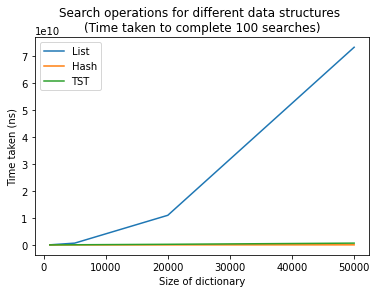

In [33]:
inputs = [50000, 20000, 5000, 1000]

plt.plot(inputs, list_search_execution_time, label='List')
plt.plot(inputs, hash_search_execution_time, label='Hash')
plt.plot(inputs, tst_search_execution_time, label='TST')

plt.title("Search operations for different data structures \n(Time taken to complete 100 searches)")
plt.xlabel("Size of dictionary")
plt.ylabel("Time taken (ns)")
plt.legend(loc = 'upper left')

plt.show()

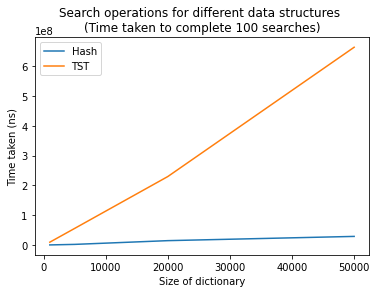

In [34]:
plt.plot(inputs, hash_search_execution_time, label='Hash')
plt.plot(inputs, tst_search_execution_time, label='TST')

plt.title("Search operations for different data structures \n(Time taken to complete 100 searches)")
plt.xlabel("Size of dictionary")
plt.ylabel("Time taken (ns)")
plt.legend(loc = 'upper left')

plt.show()

In [35]:
print(list_search_execution_time, hash_search_execution_time, tst_search_execution_time)

[73346957000, 10993877000, 660436000, 31249000] [29111000, 14880000, 2342000, 570000] [663180000, 229776000, 55852000, 9686000]


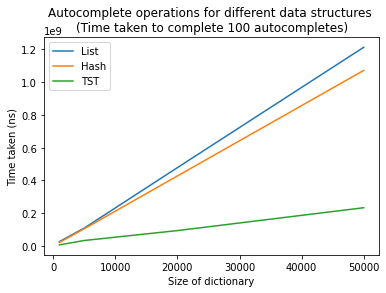

In [36]:
inputs = [50000, 20000, 5000, 1000]

plt.plot(inputs, list_auto_execution_time, label='List')
plt.plot(inputs, hash_auto_execution_time, label='Hash')
plt.plot(inputs, tst_auto_execution_time, label='TST')

plt.title("Autocomplete operations for different data structures \n(Time taken to complete 100 autocompletes)")
plt.xlabel("Size of dictionary")
plt.ylabel("Time taken (ns)")
plt.legend(loc = 'upper left')

plt.show()

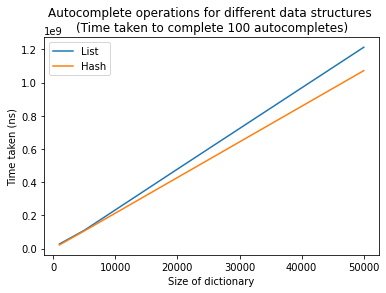

In [37]:
inputs = [50000, 20000, 5000, 1000]

plt.plot(inputs, list_auto_execution_time, label='List')
plt.plot(inputs, hash_auto_execution_time, label='Hash')

plt.title("Autocomplete operations for different data structures \n(Time taken to complete 100 autocompletes)")
plt.xlabel("Size of dictionary")
plt.ylabel("Time taken (ns)")
plt.legend(loc = 'upper left')

plt.show()

In [38]:
print(list_auto_execution_time, hash_auto_execution_time, tst_auto_execution_time) 

[1212398000, 478362000, 109642000, 27161000] [1071470000, 427598000, 105760000, 21731000] [233732000, 94346000, 33955000, 6961000]
